In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import pandas as pd
import math
import itertools


In [2]:
# build function to extract

def extractData(iterationID, usedDatas, combination=None, useIterIDasName=False):
    '''
    Input :
    -- iterationID : array like
    -- usedDatas : array like inside dictionary with iterationID as key(s)

    Output :
    -- a dictionary of besttrain, besttest (in r2 parameters)
    '''
    bestTrain = {}
    bestTest = {}
    for iterid in iterationID:
        currentData = usedDatas[iterid]
        for usedData in currentData:
            combination = len(usedData)
            if combination == 1:
                namecomb = '{}'.format(usedData[0])
            elif combination == 2:
                namecomb = '{}{}'.format(usedData[0], usedData[1])
            elif combination == 3:
                namecomb = '{}{}{}'.format(usedData[0], usedData[1], usedData[2])
            elif combination == 4:
                namecomb = '{}{}{}{}'.format(usedData[0], usedData[1], usedData[2], usedData[3])
            elif combination == 5:
                namecomb = '{}{}{}{}{}'.format(usedData[0], usedData[1], usedData[2], usedData[3], usedData[4])
            elif combination == 6:
                namecomb = '{}{}{}{}{}{}'.format(usedData[0], usedData[1], usedData[2], usedData[3], usedData[4], usedData[5])
            elif combination == 7:
                namecomb = '{}{}{}{}{}{}{}'.format(usedData[0], usedData[1], usedData[2], usedData[3], usedData[4], usedData[5], usedData[6])
            elif combination == 8:
                namecomb = '{}{}{}{}{}{}{}{}'.format(usedData[0], usedData[1], usedData[2], usedData[3], usedData[4], usedData[5], usedData[6], usedData[7])
            path = 'models_statistics/{}_GS_{}.csv'.format(iterid, namecomb)
            if useIterIDasName:
                namecomb = '{}{}'.format(iterid, namecomb)

            df = pd.read_csv(path, header=None, names=['flayer', 'slayer', 'epochs', 'train_mse', 'test_mse', 'train_rmse', 'test_rmse', 'train_r2', 'test_r2', 'train_nse', 'test_nse'])

            rowTrain = df.loc[df['train_r2'] == df['train_r2'].max()]
            bestTrain[namecomb] = {'flayer':rowTrain['flayer'].values[0],
                                   'slayer':rowTrain['slayer'].values[0],
                                   'epochs':rowTrain['epochs'].values[0],
                                   'train_r2':rowTrain['train_r2'].values[0],
                                   'test_r2':rowTrain['test_r2'].values[0]}

            rowTest = df.loc[df['test_r2'] == df['test_r2'].max()]
            bestTest[namecomb] = {'flayer':rowTest['flayer'].values[0],
                                   'slayer':rowTest['slayer'].values[0],
                                   'epochs':rowTest['epochs'].values[0],
                                   'train_r2':rowTest['train_r2'].values[0],
                                   'test_r2':rowTest['test_r2'].values[0]}
    return bestTrain, bestTest

def extractDataOffset(iterationID, usedDatas, offsets, dimension=72):
    '''
    Input :
    -- iterationID : array like
    -- usedDatas : array like inside dictionary with iterationID as key(s)
    -- offsets : array like offset data 

    Output :
    -- a dictionary of besttrain, besttest (in r2 parameters)
    '''
    bestTrain = {}
    bestTest = {}
    for iterid in iterationID:
        currentData = usedDatas[iterid]
        for usedData in currentData:
            for offset in offsets[iterid]:
                namecomb = '{}{}{}{}-{}'.format(usedData[0], usedData[1], usedData[2], dimension, offset)
                path = 'models_statistics/{}_GS_{}.csv'.format(iterid, namecomb)

                df = pd.read_csv(path, header=None, names=['flayer', 'slayer', 'epochs', 'train_mse', 'test_mse', 'train_rmse', 'test_rmse', 'train_r2', 'test_r2', 'train_nse', 'test_nse'])

                rowTrain = df.loc[df['train_r2'] == df['train_r2'].max()]
                bestTrain[namecomb] = {'flayer':rowTrain['flayer'].values[0],
                                       'slayer':rowTrain['slayer'].values[0],
                                       'epochs':rowTrain['epochs'].values[0],
                                       'train_r2':rowTrain['train_r2'].values[0],
                                       'test_r2':rowTrain['test_r2'].values[0]}

                rowTest = df.loc[df['test_r2'] == df['test_r2'].max()]
                bestTest[namecomb] = {'flayer':rowTest['flayer'].values[0],
                                       'slayer':rowTest['slayer'].values[0],
                                       'epochs':rowTest['epochs'].values[0],
                                       'train_r2':rowTest['train_r2'].values[0],
                                       'test_r2':rowTest['test_r2'].values[0]}
    return bestTrain, bestTest

def extractRecurrentData(iterationID, usedDatas, dimensions, recurrents):
    '''
    Input :
    -- iterationID : array like
    -- usedDatas : array like inside dictionary with iterationID as key(s)
    -- recurrents : array like recurrent data 
    -- dimensions : array like in pair with usedDatas

    Output :
    -- a dictionary of besttrain, besttest (in r2 parameters)
    '''
    bestTrain = {}
    bestTest = {}
    for iterid in iterationID:
        for i in range(len(usedDatas[iterid])):
            usedData = usedDatas[iterid][i]
            dim = dimensions[iterid][i]
            for recurrent in recurrents[iterid]:
                # define the length of data
                dataLength = len(usedData)
                # read stored data
                if dataLength == 1:
                    fileName = '{}{}'.format(usedData[0], dim)
                elif dataLength == 2:
                    fileName = '{}{}{}'.format(usedData[0], usedData[1], dim)
                elif dataLength == 3:
                    fileName = '{}{}{}{}'.format(usedData[0], usedData[1], usedData[2], dim)
                elif dataLength == 4:
                    fileName = '{}{}{}{}{}'.format(usedData[0], usedData[1], usedData[2], usedData[3], dim)
                elif dataLength == 5:
                    fileName = '{}{}{}{}{}{}'.format(usedData[0], usedData[1], usedData[2], usedData[3], usedData[4], dim)
                elif dataLength == 6:
                    fileName = '{}{}{}{}{}{}{}'.format(usedData[0], usedData[1], usedData[2], usedData[3], usedData[4], usedData[5], dim)
                elif dataLength == 7:
                    fileName = '{}{}{}{}{}{}{}{}'.format(usedData[0], usedData[1], usedData[2], usedData[3], usedData[4], usedData[5], usedData[6], dim)
                elif dataLength == 8:
                    fileName = '{}{}{}{}{}{}{}{}{}'.format(usedData[0], usedData[1], usedData[2], usedData[3], usedData[4], usedData[5], usedData[6], usedData[7], dim)
                fullFileName = '{}r{}f'.format(fileName, recurrent)
                path = 'models_statistics/{}_GS_{}.csv'.format(iterid, fullFileName)
                df = pd.read_csv(path, header=None, names=['flayer', 'slayer', 'epochs', 'train_mse', 'test_mse', 'train_rmse', 'test_rmse', 'train_r2', 'test_r2', 'train_nse', 'test_nse'])
                rowTrain = df.loc[df['train_r2'] == df['train_r2'].max()]
                bestTrain[fullFileName] = {'flayer':rowTrain['flayer'].values[0],
                                       'slayer':rowTrain['slayer'].values[0],
                                       'epochs':rowTrain['epochs'].values[0],
                                       'train_r2':rowTrain['train_r2'].values[0],
                                       'test_r2':rowTrain['test_r2'].values[0]}

                rowTest = df.loc[df['test_r2'] == df['test_r2'].max()]
                bestTest[fullFileName] = {'flayer':rowTest['flayer'].values[0],
                                       'slayer':rowTest['slayer'].values[0],
                                       'epochs':rowTest['epochs'].values[0],
                                       'train_r2':rowTest['train_r2'].values[0],
                                       'test_r2':rowTest['test_r2'].values[0]}
    return bestTrain, bestTest

def round_up(n, decimals=0):
    multiplier = 10 ** decimals
    return math.ceil(n * multiplier) / multiplier

def round_down(n, decimals=0):
    multiplier = 10 ** decimals
    return math.floor(n * multiplier) / multiplier

def resultHistogram(combinedDataFrame, iterationIDs, labels, title, bins=250):
    datas = []
    for iterID in iterationIDs:
        datas.append(combinedDataFrame[combinedDataFrame.index.str.contains(iterID, regex=True, na=False)])

    bins=250
    plt.figure(figsize=(12,6))
    for i in range(len(datas)):
        _, bins, _ = plt.hist(datas[i]['test_r2'], bins=bins, range=[round_down(combinedDataFrame['test_r2'].min(),1),round_up(combinedDataFrame['test_r2'].max(),1)], alpha=0.9, label=labels[i])
    plt.title(title)
    plt.ylabel('Frequency')
    plt.xlabel('R^2 Correlation Number')
    plt.xticks(np.arange(round_down(combinedDataFrame['test_r2'].min(),1),round_up(combinedDataFrame['test_r2'].max(),1),0.05))
    plt.grid(axis='both')
    plt.legend()
    plt.show()
    
def resultsRNN(rnnDF, identifier, labels, chartTitle, figsize=(10,6), dpi=100):
    '''
    Showing RNN chart data from various combination that mentioned in dataLabels inside rnnDF
    '''
    plt.figure(figsize=figsize, dpi=dpi)
    for i in range(len(identifier)):
        x = rnnDF[rnnDF.index.str.startswith(identifier[i], na=False)].sort_values(by=['test_r2'])['test_r2']
        y = x.shape[0]
        plt.plot(np.arange(1,y+1, 1), x, label=f'{labels[i]}')
    plt.legend()
    plt.title(chartTitle)
    plt.xlabel('... of recurrent data')
    plt.ylabel('R^2')
    plt.xlim(1,y)
    plt.grid('both')
    plt.show()
    
def generateCombinations(combinationLists, usedDatas=('cloud','psf','qvapor','rain','sst','wind','winu','wn10'), singleList=True):
    '''
    Return list of combinations of dataset
    
    Params :
    cmbinationLists : array like integer dtype
    '''
    results = []
    for combinationList in combinationLists:
        combs = list(itertools.combinations(usedDatas, combinationList))
        if singleList:
            for comb in combs:
                results.append(comb)
        elif not singleList:
            results.append(combs)
    return results

def mergeNameIdentifier(combinationLists, usedDatas=('cloud','psf','qvapor','rain','sst','wind','winu','wn10')):
    '''
    Return list with merged filename for identifying different dataset combination
    '''
    allCombinations = generateCombinations(combinationLists, singleList=False)

    mergedIdentifier = []
    for allCombination in allCombinations:
        cache = []
        for datas in allCombination:
            name = ''
            for data in datas:
                name = f'{name}{data}'
            name = f'{name}'
            cache.append(name)
        mergedIdentifier.append(cache)
    return mergedIdentifier

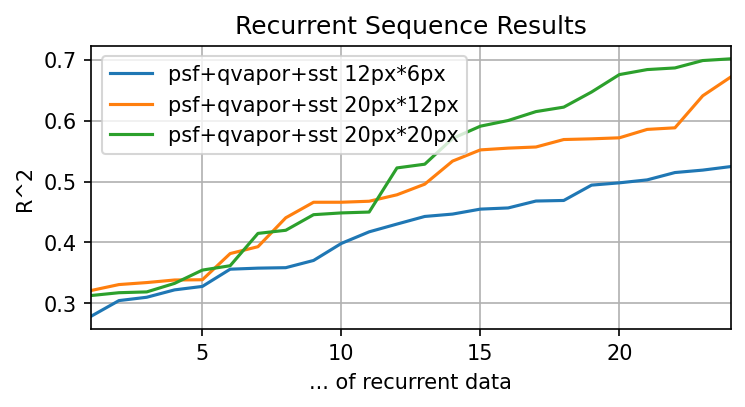

In [3]:
# Manggarai RNN Results
iID = (58,70,71)
usedDatasPQS = ((('psf','qvapor','sst'),),(('psf','qvapor','sst'),),(('psf','qvapor','sst'),))
dimensionsPQS = [(72,),(240,),(400,)]
recurrentsPQS = (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24)
_, manggaraiRNN = extractRecurrentData(iterationID=(58,70,71),
                                       usedDatas={iID[0]:usedDatasPQS[0], iID[1]:usedDatasPQS[1], iID[2]:usedDatasPQS[2]},
                                       dimensions={iID[0]:dimensionsPQS[0], iID[1]:dimensionsPQS[1], iID[2]:dimensionsPQS[2]},
                                       recurrents={iID[0]:recurrentsPQS, iID[1]:recurrentsPQS, iID[2]:recurrentsPQS})
manggaraiRNN_DF = pd.DataFrame(manggaraiRNN).T
identifier = ('psfqvaporsst72','psfqvaporsst240','psfqvaporsst400')
labels = ('psf+qvapor+sst 12px*6px','psf+qvapor+sst 20px*12px','psf+qvapor+sst 20px*20px')
resultsRNN(manggaraiRNN_DF, identifier, labels, 'Recurrent Sequence Results', figsize=(5.5,2.5), dpi=150)

C:\ProgramData\Anaconda3-2018\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3-2018\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3-2018\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

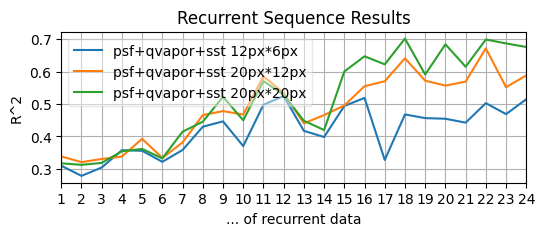

In [6]:
manggaraiRNN_DF = pd.DataFrame(manggaraiRNN).T
identifiers = ('psfqvaporsst','psfqvaporsst','psfqvaporsst')
labels = ('psf+qvapor+sst 12px*6px','psf+qvapor+sst 20px*12px','psf+qvapor+sst 20px*20px')
chartTitle = 'Recurrent Sequence Results'
dims = (72,240,400)
figsize = (6,2)
dpi = 100
rnnDF = manggaraiRNN_DF

plt.figure(figsize=figsize, dpi=dpi)
for i in range(len(identifiers)):
    
    ccDF = rnnDF[rnnDF.index.str.startswith(f'{identifiers[i]}{dims[i]}', na=False)]
    ccDF['rn'] = ccDF.index.str.replace(f'{identifiers[i]}{dims[i]}r', '').str.replace('f', '')
    ccDF['rn'] = ccDF['rn'].astype('int32')
    
    plt.plot(ccDF['rn'], ccDF['test_r2'], label=f'{labels[i]}')
plt.legend(framealpha=0.45)
plt.title(chartTitle)
plt.xlabel('... of recurrent data')
plt.ylabel('R^2')
plt.xticks(ticks=np.arange(1,25,1), labels=np.arange(1,25,1))
plt.xlim(1,24)
plt.grid('both')
plt.show()